In [51]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [52]:
df1 = pd.read_csv(r"E:\BlackFriday.csv")

In [53]:
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [54]:
df1 = df1.fillna(0)

In [55]:
new_df = df1["Stay_In_Current_City_Years"]
new_df

0          2
1          2
2          2
3          2
4         4+
5          3
6          2
7          2
8          2
9          1
10         1
11         1
12         1
13         1
14         1
15         1
16         1
17         1
18         1
19        4+
20        4+
21        4+
22        4+
23        4+
24        4+
25         0
26         0
27         0
28         0
29        4+
          ..
537547     1
537548     1
537549     1
537550     3
537551     3
537552     3
537553     3
537554     3
537555     3
537556     1
537557     1
537558     1
537559     1
537560     1
537561     1
537562     1
537563     1
537564     1
537565     1
537566     1
537567     1
537568     1
537569     1
537570     1
537571     1
537572     1
537573     1
537574     1
537575     1
537576     1
Name: Stay_In_Current_City_Years, Length: 537577, dtype: object

In [56]:
new_df = df1.Stay_In_Current_City_Years.replace(['4+'],4)
new_df.head(10)

0    2
1    2
2    2
3    2
4    4
5    3
6    2
7    2
8    2
9    1
Name: Stay_In_Current_City_Years, dtype: object

In [57]:
df1['new_stay'] = new_df
df1.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,new_stay
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370,2
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,2
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422,2
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057,2
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969,4
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,0.0,15227,3
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215,2
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,0.0,15854,2
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,0.0,15686,2
9,1000005,P00274942,M,26-35,20,A,1,1,8,0.0,0.0,7871,1


In [102]:
new_df = df1.Age.replace(['0-17','18-25','26-35','36-45','46-50','51-55','55+'],[0,1,2,3,4,5,6])
new_df.head(10)

0    0
1    0
2    0
3    0
4    6
5    2
6    4
7    4
8    4
9    2
Name: Age, dtype: int64

In [103]:
df1['new_age'] = new_df
df1.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,new_stay,new_age,new_city,new_gender,combined_G_M
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370,2,0,0,1,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,2,0,0,1,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422,2,0,0,1,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057,2,0,0,1,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969,4,6,2,0,M_0
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,0.0,15227,3,2,0,0,M_0
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215,2,4,1,0,M_1
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,0.0,15854,2,4,1,0,M_1
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,0.0,15686,2,4,1,0,M_1
9,1000005,P00274942,M,26-35,20,A,1,1,8,0.0,0.0,7871,1,2,0,0,M_1


In [104]:
new_df = df1.City_Category.replace(['A','B','C'],[0,1,2])
new_df.head(10)

0    0
1    0
2    0
3    0
4    2
5    0
6    1
7    1
8    1
9    0
Name: City_Category, dtype: int64

In [105]:
df1['new_city'] = new_df
df1.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,new_stay,new_age,new_city,new_gender,combined_G_M
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370,2,0,0,1,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,2,0,0,1,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422,2,0,0,1,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057,2,0,0,1,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969,4,6,2,0,M_0
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,0.0,15227,3,2,0,0,M_0
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215,2,4,1,0,M_1
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,0.0,15854,2,4,1,0,M_1
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,0.0,15686,2,4,1,0,M_1
9,1000005,P00274942,M,26-35,20,A,1,1,8,0.0,0.0,7871,1,2,0,0,M_1


In [106]:
new_df = df1.Gender.replace(['M','F'],[0,1])
new_df.head(10)

0    1
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    0
9    0
Name: Gender, dtype: int64

In [107]:
df1['new_gender'] = new_df
df1.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,new_stay,new_age,new_city,new_gender,combined_G_M
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370,2,0,0,1,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,2,0,0,1,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422,2,0,0,1,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057,2,0,0,1,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969,4,6,2,0,M_0
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,0.0,15227,3,2,0,0,M_0
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215,2,4,1,0,M_1
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,0.0,15854,2,4,1,0,M_1
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,0.0,15686,2,4,1,0,M_1
9,1000005,P00274942,M,26-35,20,A,1,1,8,0.0,0.0,7871,1,2,0,0,M_1


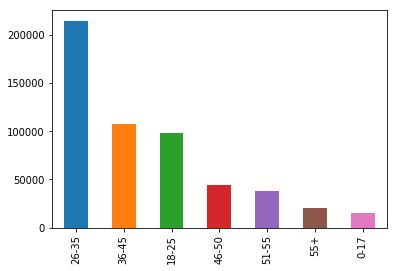

In [108]:
AgeGroup = df1['Age'].map(lambda n: n.split("|")[0].split(":")[0]).value_counts().head(20)
AgeGroup.plot.bar()

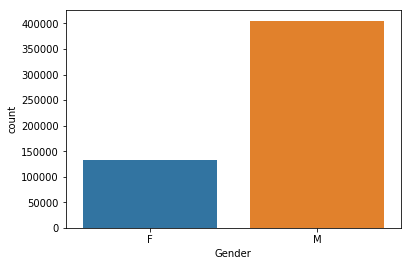

In [109]:
sns.countplot(df1['Gender'])

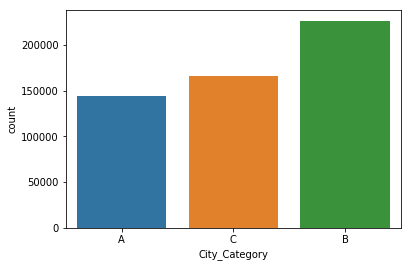

In [110]:
sns.countplot(df1['City_Category'])

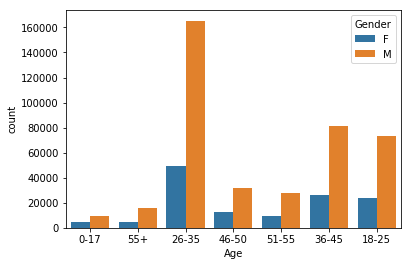

In [111]:
sns.countplot(df1['Age'],hue=df1['Gender'])

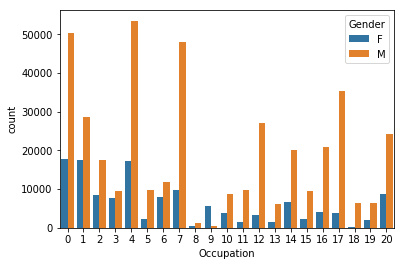

In [112]:
sns.countplot(df1['Occupation'],hue=df1['Gender'])

In [113]:
print(df1['Gender'].value_counts())

M    405380
F    132197
Name: Gender, dtype: int64


In [114]:
df1_Male = df1.loc[df1['Gender'] == 'M']
df1_Female = df1.loc[df1['Gender'] == 'F']

In [115]:
total_spending_male = df1_Male['Purchase'].sum()
total_spending_male

3853044357

In [116]:
total_spending_female = df1_Female['Purchase'].sum()
total_spending_female

1164624021

In [117]:
spending_data = [['M',total_spending_male],['F',total_spending_female]]
df2 = pd.DataFrame(spending_data, columns=('Gender','Purchase'))
df2

,Gender,Purchase
0,M,3853044357
1,F,1164624021


In [118]:
df1_A = df1.loc[df1['City_Category'] == 'A']
df1_B = df1.loc[df1['City_Category'] == 'B']
df1_C = df1.loc[df1['City_Category'] == 'C']

In [119]:
total_spending_A = df1_A['Purchase'].sum()
total_spending_A

1295668797

In [120]:
total_spending_B = df1_B['Purchase'].sum()
total_spending_B

2083431612

In [121]:
total_spending_C = df1_C['Purchase'].sum()
total_spending_C

1638567969

In [122]:
spending_data_City = [['A',total_spending_A],['B',total_spending_B],['C',total_spending_C]]
df3 = pd.DataFrame(spending_data_City, columns=('City_Category','Purchase'))
df3

,City_Category,Purchase
0,A,1295668797
1,B,2083431612
2,C,1638567969


In [123]:
df1['combined_G_M'] = df1.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
print(df1['combined_G_M'].unique())

['F_0' 'M_0' 'M_1' 'F_1']


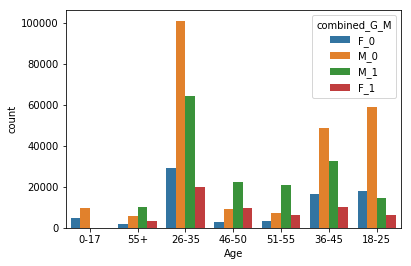

In [124]:
sns.countplot(df1['Age'],hue=df1['combined_G_M'])

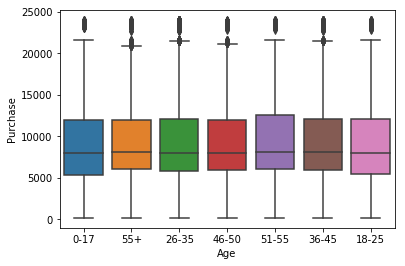

In [125]:
sns.boxplot('Age','Purchase', data = df1)
plt.show()

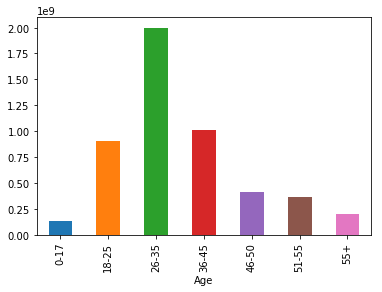

In [126]:
Age_buy = df1.groupby(["Age"])["Purchase"].sum()
Age_buy.plot.bar()

In [127]:
df2 = df1.head(1000) 

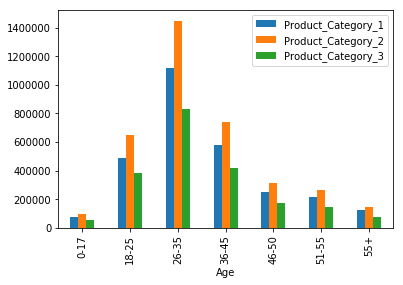

In [128]:
product_age = df1.groupby(["Age"])["Product_Category_1", "Product_Category_2", "Product_Category_3"].sum()
product_age.plot.bar()


In [129]:
df1.Purchase.describe()

count    537577.000000
mean       9333.859853
std        4981.022133
min         185.000000
25%        5866.000000
50%        8062.000000
75%       12073.000000
max       23961.000000
Name: Purchase, dtype: float64

In [130]:
df10 = df1.head(1000)

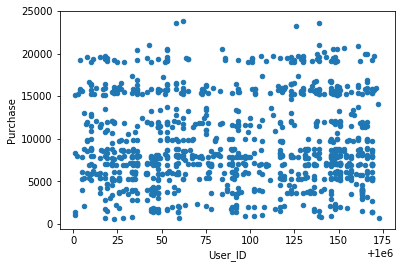

In [131]:
df10.plot.scatter(x = "User_ID",y="Purchase")

In [132]:
clean_data = df1.copy()
clean_data['good_customer'] = (clean_data['Purchase'] > 15000)*1
print(clean_data['good_customer'])

0         0
1         1
2         0
3         0
4         0
5         1
6         1
7         1
8         1
9         0
10        0
11        0
12        0
13        1
14        0
15        0
16        0
17        0
18        0
19        1
20        0
21        0
22        0
23        0
24        0
25        1
26        0
27        0
28        0
29        1
         ..
537547    0
537548    1
537549    0
537550    0
537551    0
537552    1
537553    1
537554    0
537555    0
537556    0
537557    0
537558    0
537559    0
537560    0
537561    0
537562    0
537563    0
537564    0
537565    0
537566    0
537567    0
537568    0
537569    0
537570    1
537571    0
537572    0
537573    1
537574    0
537575    0
537576    0
Name: good_customer, Length: 537577, dtype: int32


In [133]:
y=clean_data[['good_customer']].copy()

In [134]:
y.head()

,good_customer
0,0
1,1
2,0
3,0
4,0


In [135]:
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,new_stay,new_age,new_city,new_gender,combined_G_M
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370,2,0,0,1,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,2,0,0,1,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422,2,0,0,1,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057,2,0,0,1,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969,4,6,2,0,M_0


In [136]:
df1.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'new_stay',
       'new_age', 'new_city', 'new_gender', 'combined_G_M'],
      dtype='object')

In [137]:
customer_features = ['new_age', 'Occupation', 'new_city',
       'new_stay', 'Marital_Status','new_gender', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']

In [138]:
X = clean_data[customer_features].copy()

In [139]:
X.head()

,new_age,Occupation,new_city,new_stay,Marital_Status,new_gender,Product_Category_1,Product_Category_2,Product_Category_3
0,0,10,0,2,0,1,3,0.0,0.0
1,0,10,0,2,0,1,1,6.0,14.0
2,0,10,0,2,0,1,12,0.0,0.0
3,0,10,0,2,0,1,12,14.0,0.0
4,6,16,2,4,0,0,8,0.0,0.0


In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [141]:
good_customer_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
good_customer_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [142]:
predictions = good_customer_classifier.predict(X_test)

In [143]:
predictions[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [144]:
y_test['good_customer'][:10]

11096     0
81136     0
111982    0
304352    0
330642    0
70811     0
181976    0
46477     0
344564    0
437618    0
Name: good_customer, dtype: int32

In [145]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.8441102361317017